# Predicting the Risk of Diabetes using Logistic Regression

## 1. Summary

We attempt to develop a logistic regression model to predict whether a patient has diabetes or not using the [Diabetes Health Indicators](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators) dataset sourced from the UCI machine learning repository (CDC, 2023). We employ Random Over-Sampling Examples (ROSE) to balance the data and a tuned Least Absolute Shrinkage and Selection Operator (LASSO) regression model to classify patients who are at high risk of developing diabetes, using 5 out of the 21 risk factors provided in the dataset. Recall was used to measure the classifier's performance, as the consequences of false negatives would be more severe than false positives for this task. The area under the receiver operating characteristic (ROC) curve (AUC) was also chosen to evaluate the model's effectiveness in distinguishing between the two classes compared to random guessing.

## 2. Introduction

Diabetes is a chronic condition characterized by high blood sugar levels, resulting from excess buildup of glucose in the bloodstream (Mayo Foundation for Medical Education and Research, 2024). Diabetes is linked to a variety of complications, including retinopathy, cardiovascular disease, stroke, and increased susceptibility to infections (Papatheodorou et al., 2018). Individuals with diabetes often experience significant reductions in their years of healthy life (Ong et al., 2023). In 2021, diabetes-related conditions resulted in over 2 million deaths worldwide and the prevalence of diabetes continues to rise, with its growth only accelerating in the 21st century (Fang et al., 2022). The true mortality rate may be higher than current estimates suggest, as many cases of diabetes go undiagnosed (Stokes & Preston, 2017). However, advancements in screening and detection methods have the potential to reduce the number of undiagnosed cases (Fang et al., 2022). As such, accurate diagnosis in the early stages is crucial since interventions can be administered to prevent the progression of diabetes (Mayo Foundation for Medical Education and Research, 2024). 

This project aims to develop a classification model to predict diabetes status based on various health indicators. By using data preprocessing strategies, we seek to improve the accuracy of diabetes detection using publicly available health datasets. Ultimately, the goal is to answer the following question: **Can we develop a classification model that can predict whether a person will have diabetes more accurately than random guessing?**

The dataset used in this project is sourced from the [CDC Diabetes Health Indicators dataset on the UCI machine learning repository](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators) (CDC, 2023), which contains various demographic and lifestyle-related features that may influence the likelihood of an individual developing diabetes. The dataset contains 23 features, of which 21 can be used as predictors in a classification model. The total 23 features are:

- `ID`: Patient identification number. This feature was removed from the publicly available dataset.
- `Diabetes_binary`: Diabetes/pre-diabetes (1) or no diabetes (0)
- `HighBP`: High blood pressure (1) or not (0)
- `HighChol`: High cholesterol (1) or not (0)
- `CholCheck`: Cholesterol check in past 5 years (1) or no check (0)
- `BMI`: Body mass index
- `Smoker`: Have smoked at least 100 cigarettes in lifetime (1) or not (0)
- `Stroke`: Had a stroke in the past (1) or not (0)
- `HeartDiseaseorAttack`: Had coronary heart disease or myocardial infarction (1) or not (0)
- `PhysActivity`: Physical activity in the last 30 days (1) or not (0)
- `Fruits`: Consume fruit 1 or more times per day (1) or not (0)
- `Veggies`: Consume vegetables 1 or more times per day (1) or not (0)
- `HvyAlcoholConsump`: Having more than 14 drinks per day for adult men and 7 drinks for women, yes (1) or no (0)
- `AnyHealthcare`: Have any kind of health care coverage (1) or not (0)
- `NoDocbcCost`: Could not see a doctor in the past 12 months due to cost (1) or not (0)
- `GenHlth`: General health rating on scale of 1 - 5
    - (1) = Excellent
    - (2) = Very good
    - (3) = Good
    - (4) = Fair
    - (5) = Poor
- `MentHlth`: Number of days where mental health was not good in the last 30 days (1 - 30)
- `PhysHlth`:	Number of days where physical health was not good in the last 30 days (1 - 30)
- `DiffWalk`: Serious difficulty walking or climbing stairs (1) or not (0)
- `Sex`: Male (1) or female (0)
- `Age`: Age based on 13-level scale (See codebook _AGEG5YR for more information)
    - (1) = Age 18-24
    - (9) = 60-64
    - (13) = 80 or older 
- `Education`: Education level based on 6-level scale:
    - (1) = Never attended school/only kindergarten
    - (2) = Grades 1 through 8
    - (3) = Grades 9 through 11
    - (4) = Grade 12 or GED
    - (5) = College 1 year to 3 years
    - (6) = College 4 years or more
- `Income`: Income based on 8-level scale (See codebook INCOME2 for more information)
    - (1) = Less than \$10,000
    - (5) = Less than \$35,000
    - (8) = \$75,000 or more

The primary objective is to classify individuals into diabetic/high risk of diabetes (`Diabetes_binary = 1`) or non-diabetic (`Diabetes_binary = 0`) categories using predictive modelling.

## 3. Methods & Results

<!-- *describe in written english the methods you used to perform your analysis from beginning to end that narrates the code that does the analysis.* -->
The project follows a structured approach to data preparation, exploration, and classification modelling.

*Analysis workflow:*

First, the dataset is obtained from an [external source](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators) and loaded into R. Then, the raw dataset is inspected for completeness and correctness. This includes checking for missing and unique values in each feature. Categorical variables (e.g. age, smoking status, high blood pressure) are converted into factors to facilitate the analysis.

Moreover, the dataset is highly imbalanced, with more non-diabetic cases than diabetic ones. To address this, the Random Over-Sampling Examples (ROSE) technique is applied to generate synthetic data points to balance the dataset.

Visualizations (bar plots, density plots) are generated to explore the relationships between health indicators and diabetes status. Trends between factors such as `BMI` and `HighBP` with the target variable `Diabetes_binary` are examined. The dataset is split into 75% training data and 25% testing data to build and evaluate the LASSO regression model, with the results being visualised as an ROC curve and a confusion matrix.

### 3.1. Loading Data from Original Source on the Web

The packages used in this document are `reticulate`, `tidyverse`, `tidymodels`, `glmnet`, `patchwork`, `ROSE`, and `vcd`. The dataset of interest can be acquired from the source by running `dataset_download.py` through the `py_run_file()` function, which writes the result into `cdc_diabetes_health_indicators.csv` located in the `/work/data/raw/` directory; this .csv file is then read into the variable `raw_diabetes_df`. A preview of the downloaded dataset can be seen in Table 1 below.

In [1]:
# Importing required packages for analysis. Suppress warnings and startup messages the first time libraries are loaded
suppressPackageStartupMessages({
  suppressWarnings(library(reticulate)) # Run Python code in R session
  suppressWarnings(library(tidyverse)) # Data wrangling and visualization
  suppressWarnings(library(tidymodels)) # Machine learning tools
  suppressWarnings(library(glmnet)) # Fit generalized linear models by penalty
  suppressWarnings(library(patchwork)) # Combine plots
  suppressWarnings(library(ROSE)) # Random Over-Sampling Examples for dataset balancing
  suppressWarnings(library(vcd)) # For Cramér’s V
})

In [ ]:
# Do only once. Takes ages but it works. 
# This run the python script to extract file from uci in R

library(reticulate)
# Explicitly set the Python environment
Sys.setenv(RETICULATE_PYTHON = "/venv/bin/python")
use_python("/venv/bin/python", required = TRUE)

# OR use the entire virtual environment
use_virtualenv("/venv", required = TRUE)

# Verify configuration
py_config()

py_run_file("/home/rstudio/work/src/dataset_download.py")

In [3]:
# Reads the downloaded dataset into a variable named raw_diabetes_df
raw_diabetes_df <- read_csv("/home/jovyan/work/data/raw/cdc_diabetes_health_indicators.csv", show_col_types = FALSE)

In [4]:
"Table 1. First 5 rows of the Raw Diabetes Dataset"
head(raw_diabetes_df, n = 5)

[1] "Table 1. First 5 rows of the Raw Diabetes Dataset"

HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,⋯,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,40,1,0,0,0,0,1,⋯,0,5,18,15,1,0,9,4,3,0
0,0,0,25,1,0,0,1,0,0,⋯,1,3,0,0,0,0,7,6,1,0
1,1,1,28,0,0,0,0,1,0,⋯,1,5,30,30,1,0,9,4,8,0
1,0,1,27,0,0,0,1,1,1,⋯,0,2,0,0,0,0,11,3,6,0
1,1,1,24,0,0,0,1,1,1,⋯,0,2,3,0,0,0,11,5,4,0


### 3.1. Preprocessing: Wrangling, Cleaning, and Balancing Data from Original Format

*Analysis Workflow:*

All features in the dataset are checked for the following attributes:
- `NA_Count`: Number of "NA" values within each variable; if they exist, they would need to be replaced or removed.
- `Distinct_Count`: Number of possible values for each variable; primarily to check if the variables are numerical, categorical or binary (only 2 possible values).
- `Current_Data_Type`: Current data type for each variable; primarily to ensure that they are in the appropriate format we require, as the data type may be lost during `read_csv()`.

Given the initial check, the following observations can be made using Table 2: 
- None of the columns have `NA` values.
- `BMI` is the only numerical variable, with the rest being categorical or binary.
- All variables are treated as `double` in the original dataset, and thus every variable except for `BMI` will need to be converted to the factor data type.

We aim to balance the dataset for our machine learning model to reduce bias towards the majority class, improve the model's ability to generalize to unseen data, and increase model training efficiency. In the original `raw_diabetes_df` dataset, approximately 86% of individuals do not have diabetes, resulting in heavily imbalanced classes (Table 3). To address this, we use the `ROSE()` function to create a balanced version of the dataset to form `balanced_raw_diabetes_df` by undersampling the majority class and oversampling the minority class. The size of `balanced_raw_diabetes_df` will be equal to that of the original `raw_diabetes_df`. After balancing, the distribution of individuals in both categories of `Diabetes_binary` is roughly 50-50 (Table 4). A summary of the class distribution before and after ROSE can be seen in Table 5. 

The balanced dataset, `balanced_raw_diabetes_df`, will be saved in the `/work/data/processed/` directory and then split into training (`diabetes_train`) and testing (`diabetes_test`) sets for machine learning.

In [5]:
# Checking for NA values, distinct counts of each variable, and the current data type
checking_raw_matrix <- rbind(
  NA_Count = sapply(raw_diabetes_df, function(x) sum(is.na(x))),
  Distinct_Count = sapply(raw_diabetes_df, function(x) n_distinct(x)),
  Current_Data_Type = sapply(raw_diabetes_df, typeof)
)
                    
checking_raw_df <- as.data.frame(t(checking_raw_matrix))

In [6]:
"Table 2. Summary of Missing Values, Distinct Counts of each Variable, and Data Types in the Raw Diabetes Dataset"
checking_raw_df

[1] "Table 2. Summary of Missing Values, Distinct Counts of each Variable, and Data Types in the Raw Diabetes Dataset"

,NA_Count,Distinct_Count,Current_Data_Type
,<chr>,<chr>,<chr>
HighBP,0,2,double
HighChol,0,2,double
CholCheck,0,2,double
BMI,0,84,double
Smoker,0,2,double
Stroke,0,2,double
HeartDiseaseorAttack,0,2,double
PhysActivity,0,2,double
Fruits,0,2,double


In [7]:
# Converting categorical/binary variables into factors
raw_diabetes_df <- raw_diabetes_df %>%
  mutate(across(!BMI, ~ factor(.)))

In [8]:
# Checking to see how unbalanced the dataset is with respect to the target variable
target_result <- raw_diabetes_df %>%
  group_by(Diabetes_binary) %>%
  summarise(Count = n(), Proportion = n() / nrow(raw_diabetes_df)) %>%
  ungroup()

In [9]:
"Table 3. Class Distribution of Diabetes_binary in the Raw Diabetes Dataset"
target_result

[1] "Table 3. Class Distribution of Diabetes_binary in the Raw Diabetes Dataset"

Diabetes_binary,Count,Proportion
<fct>,<int>,<dbl>
0,218334,0.860667
1,35346,0.139333


In [10]:
# Using ROSE to balance data by oversampling
# Setting the seed for consistent results
set.seed(6)

balanced_raw_diabetes_df <- ROSE(Diabetes_binary ~ ., data = raw_diabetes_df, seed = 123)$data

balanced_target_result <- balanced_raw_diabetes_df %>%
  group_by(Diabetes_binary) %>%
  summarise(Count = n(), Proportion = n() / nrow(balanced_raw_diabetes_df)) %>%
  ungroup()

In [11]:
"Table 4. Class Distribution of Diabetes_binary in the Balanced Diabetes Dataset"
balanced_target_result

[1] "Table 4. Class Distribution of Diabetes_binary in the Balanced Diabetes Dataset"

Diabetes_binary,Count,Proportion
<fct>,<int>,<dbl>
0,126884,0.5001734
1,126796,0.4998266


In [12]:
# Comparing class distribution before and after balancing
balanced_raw_comparision_df <- data.frame(
  Diabetes_binary = target_result$Diabetes_binary,
  Original_Count = target_result$Count,
  Original_Proportion = target_result$Proportion,
  Balanced_Count = balanced_target_result$Count,
  Balanced_Proportion = balanced_target_result$Proportion
)

In [13]:
"Table 5. Comparison of Class Distribution before and after running ROSE"
balanced_raw_comparision_df

[1] "Table 5. Comparison of Class Distribution before and after running ROSE"

Diabetes_binary,Original_Count,Original_Proportion,Balanced_Count,Balanced_Proportion
<fct>,<int>,<dbl>,<int>,<dbl>
0,218334,0.860667,126884,0.5001734
1,35346,0.139333,126796,0.4998266


In [14]:
# Write out balanced df into /work/data/processed/ so we don't have to run all the steps above each time
balanced_raw_diabetes_df %>% write_csv("/home/jovyan/work/data/processed/balanced_cdc_diabetes_health_indicators.csv")

In [15]:
# Split data into 75% train, 25% test for machine learning
# Setting the seed for consistent results
set.seed(6)

diabetes_split <- initial_split(balanced_raw_diabetes_df, prop = 0.75, strata = Diabetes_binary)
diabetes_train <- training(diabetes_split)
diabetes_test <- testing(diabetes_split)

### 3.2. EDA - Feature Selection and Visualization

*Analysis Workflow:*

Using every feature in the dataset would not be optimal as having a large number of features in our model could lead to a risk of overfitting, difficulty in interpretation and increased computation time. Thus, we will select only a subset of relevant predictors from the 21 total risk factors in the dataset. 

First, bar plots are created below to visually determine correlation between each categorical variable and the target variable `Diabetes_binary`. For `BMI`, a density plot was created due to this feature being numerical. Of the 21 features, it appears that `HighBP`, `HighChol`, `CholCheck`, `Stroke`, `HeartDiseaseorAttack`, `HvyAlcoholConsump`, `DiffWalk`, `Age`, `Education`, `Income`, and `GenHlth` provide the most obvious differences in distribution between their categories and the target (Fig. 1). We decided to exclude `BMI` from further feature selection given it was the only numerical feature; Including it would complicate the statistical tests, and its density plot exhibited a high degree of overlap, suggesting a weak correlation with the target (Fig. 1).

To further narrow down relevant predictors, we conducted independent chi-squared tests to determine whether a significant relationship exists between each categorical variable and the target variable `Diabetes_binary`.  All chi-squared tests yielded very small p-values (< 0.05), indicating significant relationships between each feature and the target (Table 6). However, there is a key limitation to this test: It only tests for statistical significance (i.e., whether an association exists) but does not indicate the strength of that association. In large datasets, chi-squared tests can produce extremely small p-values even for weak associations, making it difficult to determine their practical importance.

To address this, we employed Cramér’s V which provides a standardized measure of the strength of association between each categorical variable and the target variable. Cramér’s V quantifies how strong the association is on a scale from 0 (no association) to 1 (perfect association). To utilize Cramér’s V, both the variables of interest and the target variable should be categorical. More than two unique values are also allowed for the categorical variables (StatsTest.com, 2020).

We defined a Cramér’s V value greater than 0.25 to be strongly associated with the target and sufficient to include the corresponding feature in our model. This value is supported in the literature; Akoglu's (2018) correlation coefficient guide suggests that a value above 0.25 can be interpreted as a very strong relationship between the variables compared. Similarly, Dai et al. (2021) considered Cramér’s V values greater than 0.25 as reflecting a very strong association in their clinical study. Using this threshold, we selected the following features to use in our model: `GenHlth`, `HighBP`, `Age`, `HighChol`, and `DiffWalk` (Table 6).

In [16]:
options(repr.plot.width = 15, repr.plot.height = 10, warn = -1)

# Categorical variables
categorical_vars <- c("HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", 
                      "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies", 
                      "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", 
                      "DiffWalk", "Sex", "Age", "Education", "Income", "MentHlth", "PhysHlth", "GenHlth")

# Non-categorical variables
noncat_var <- c("BMI")

# --------------------------------------------------
# inits with empty lists
bar_plots <- list()
density_plots <- list()

# --------------------------------------------------
# Creating bar plots for each categorical variable in the dataset
for (var in categorical_vars) {
  p <- ggplot(diabetes_train, aes(x = !!sym(var), fill = as.factor(Diabetes_binary))) +
    geom_bar(position = "fill") + 
    scale_fill_manual(values = c("#FF9999", "#66B2FF")) + 
    labs(title = paste("Diabetes Binary by", var),
         x = var,
         y = "Proportion",
         fill = "Diabetes Binary") +
    theme_minimal()
  bar_plots[[var]] <- p
}

# --------------------------------------------------
# Density plot for BMI
for (var in noncat_var) {
  p <- ggplot(diabetes_train, aes(x = !!sym(var), fill = as.factor(Diabetes_binary))) +
    geom_density(alpha = 0.5) +
    scale_fill_manual(values = c("#FF9999", "#66B2FF")) + 
    labs(title = paste("Diabetes Binary by", var),
         x = var,
         y = "Density",
         fill = "Diabetes Binary") +
    theme_minimal()
  density_plots[[var]] <- p
}

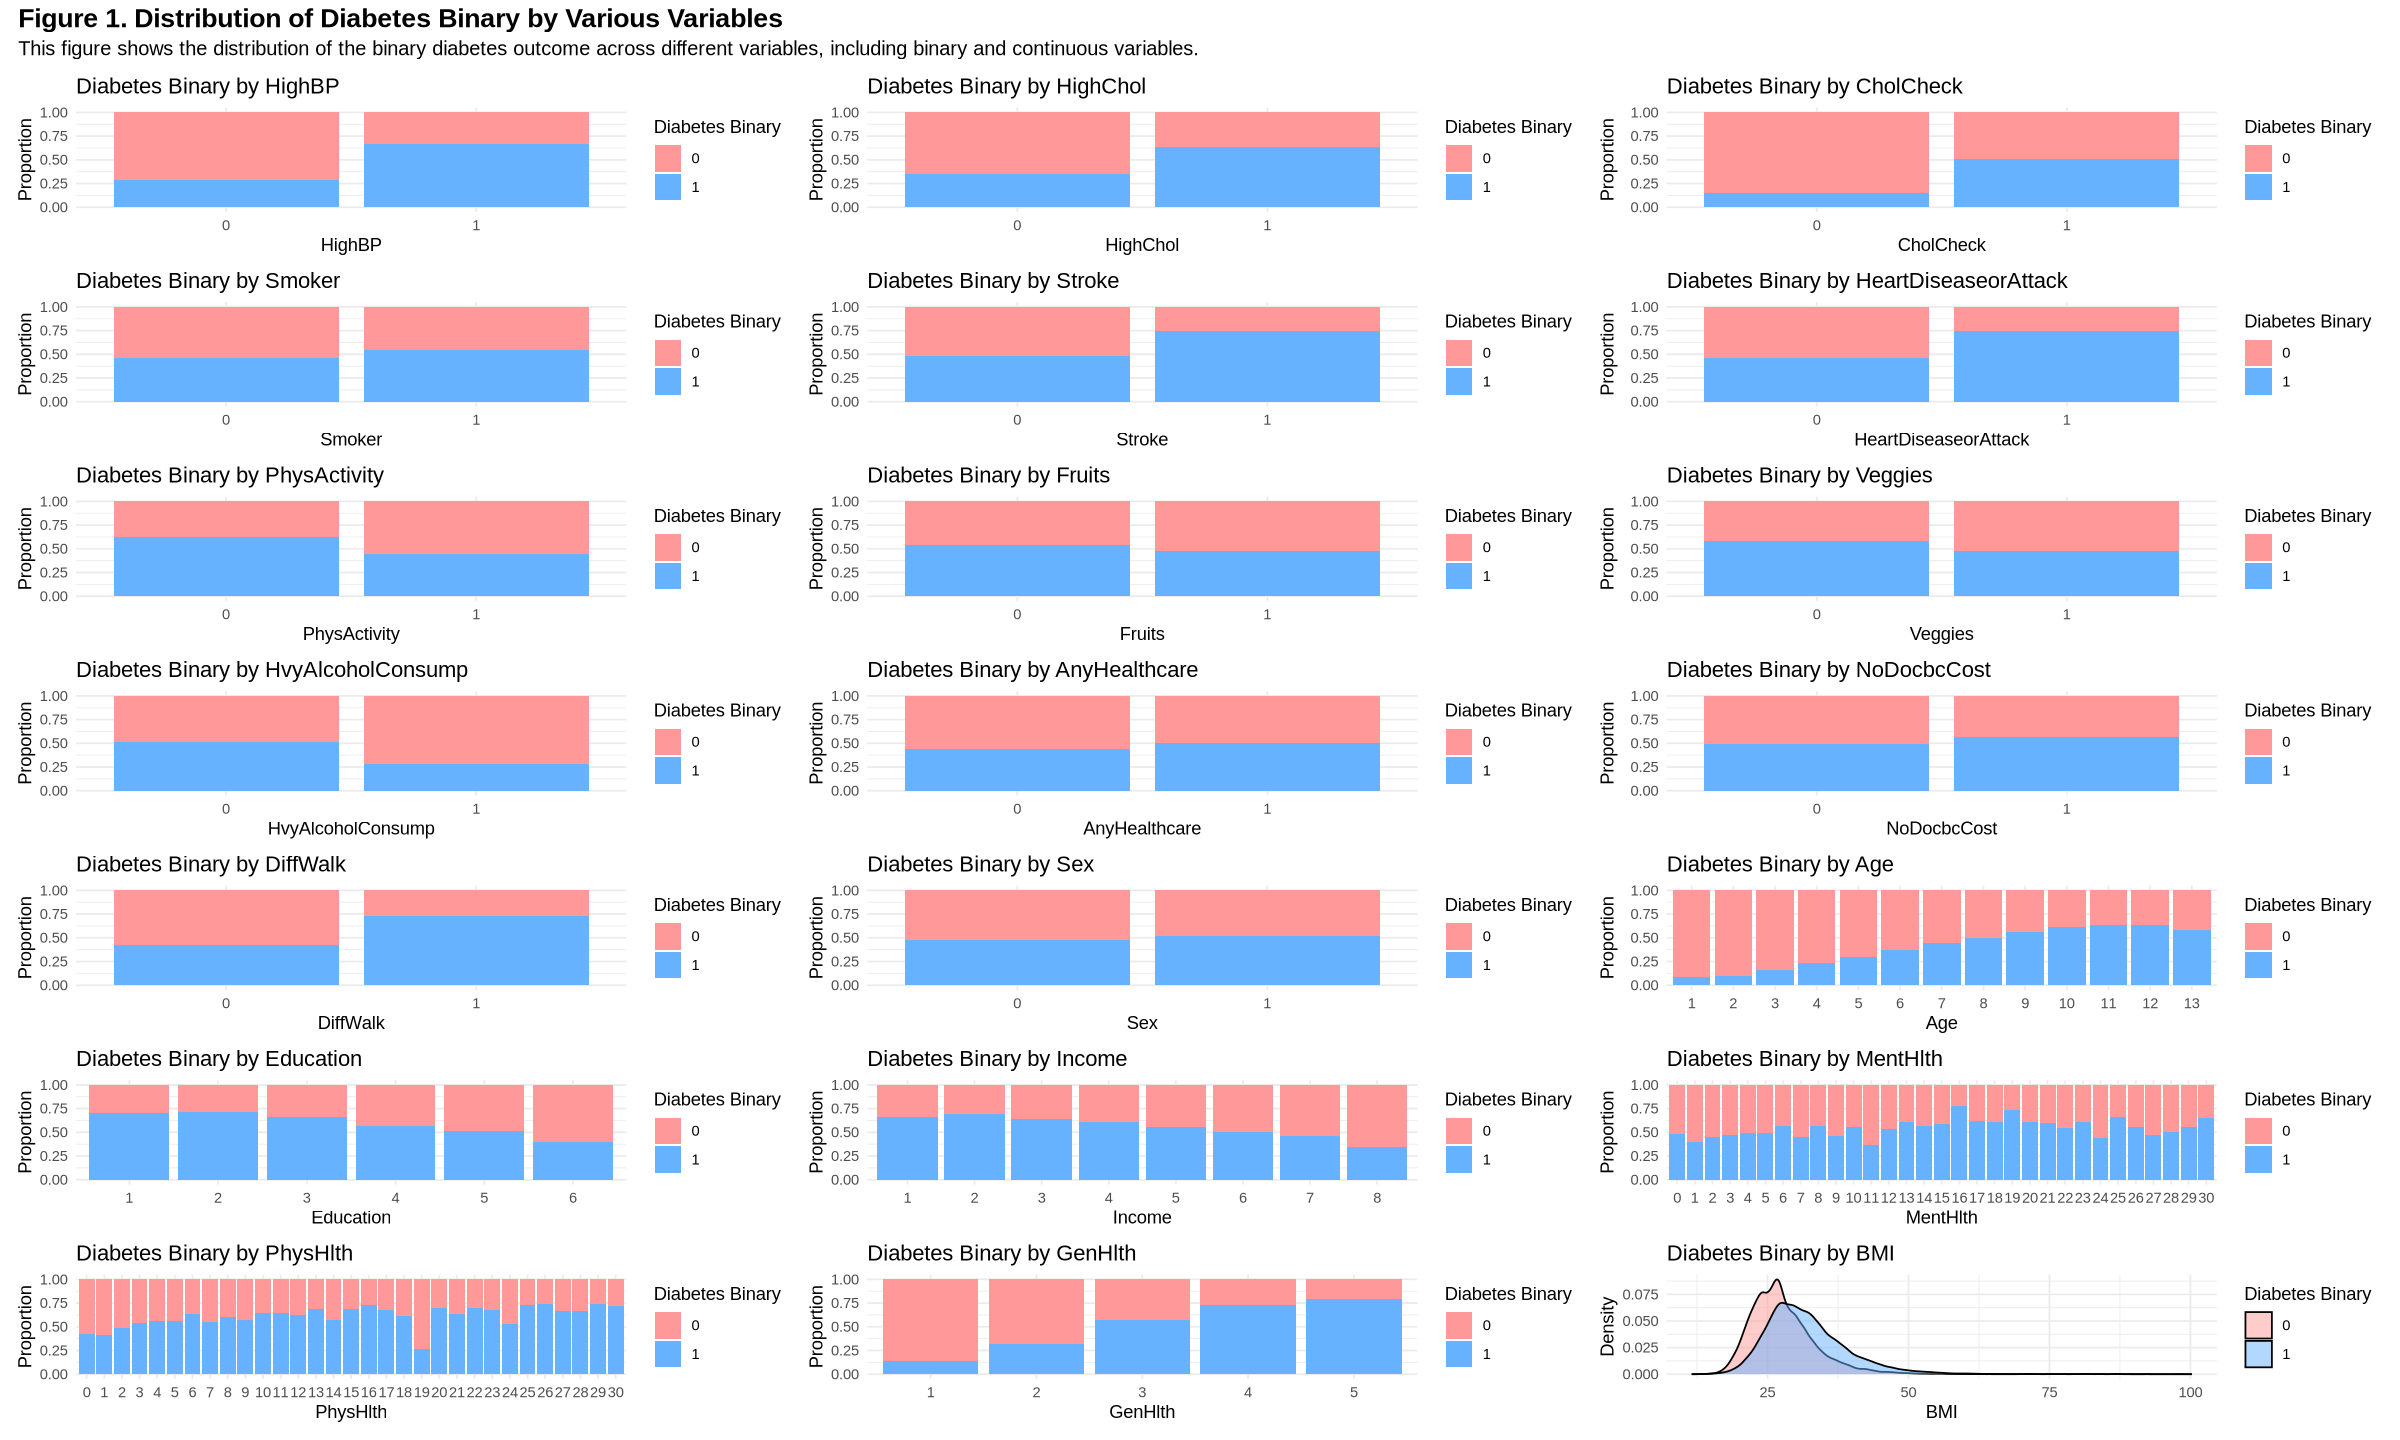

In [17]:
options(repr.plot.width = 20, repr.plot.height = 12)

# Combining all of the plots into a 3 x 7 grid
combined_plots <- wrap_plots(c(bar_plots, density_plots), ncol = 3, nrow = 7) + 
  plot_annotation(
    title = "Figure 1. Distribution of Diabetes Binary by Various Variables",
    subtitle = "This figure shows the distribution of the binary diabetes outcome across different variables, including binary and continuous variables.",
    theme =   theme(
    plot.title = element_text(size = 16, face = "bold"),  
    plot.subtitle = element_text(size = 12),  
    axis.title = element_text(size = 12),  
    axis.text = element_text(size = 10)  
  )
  )

combined_plots

In [18]:
# Run chi-squared tests independently for each feature
cramer_chi_results <- map_dfr(categorical_vars, function(var) {
    
  tbl <- table(diabetes_train$Diabetes_binary, diabetes_train[[var]])
  test_result <- chisq.test(tbl)
  cv <- assocstats(tbl)$cramer
    
  tibble(
    Variable = var,
    Statistic = test_result$statistic,
    DF = test_result$parameter,
    p_value = test_result$p.value,
    Expected_Min = min(test_result$expected),
    Expected_Max = max(test_result$expected),
    CramersV = cv
  )
})

In [19]:
"Table 6. Chi-squared Statistic, Degrees of Freedom, p-value, and Cramér’s V sorted in Descending Order"
# Arrange the results by p-value (from smallest to largest)
cramer_chi_results %>% arrange(desc(CramersV))

[1] "Table 6. Chi-squared Statistic, Degrees of Freedom, p-value, and Cramér’s V sorted in Descending Order"

Variable,Statistic,DF,p_value,Expected_Min,Expected_Max,CramersV
<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
GenHlth,32789.3996,4,0.000000e+00,7814.788158,31546.44,0.41513848
HighBP,27528.0373,1,0.000000e+00,41299.168606,53835.17,0.38038728
Age,16206.0938,12,0.000000e+00,1346.032908,14442.51,0.29185385
HighChol,15288.3299,1,0.000000e+00,44907.916320,50223.92,0.28347999
DiffWalk,14076.4239,1,0.000000e+00,24143.621823,71002.62,0.27201428
Income,10471.5847,7,0.000000e+00,4829.823983,27730.62,0.23460240
PhysHlth,10003.8551,30,0.000000e+00,9.496705,53776.65,0.22930311
HeartDiseaseorAttack,8294.3596,1,0.000000e+00,14111.603075,81041.60,0.20880863
Education,5932.3821,5,0.000000e+00,82.471381,35203.71,0.17657972


### 3.3. Classification Analysis

*Analysis Workflow:*

Given the large quantity of binary features and with the task being for classification, a logistic regression model `lr_mod` will be required. The v-fold cross-validation split `vfold_cv()` is created in preparation for cross-validation of the dataset, to provide a more effective estimate of the model performance. `lr_recipe` is created to apply one-hot encoding to the categorical features, and normalization to all numerical variables.

`lambda_grid` is created as a grid of hyperparameters for tuning with the cross-validation set with penalty terms, while `tune_grid()` is used for hyperparameter tuning, specifically tuned for higher recall, as the consequences of false negatives for this task would be more severe. The metric that maximizes recall is selected for the finalized workflow `lasso_tuned_wflow`.

In [20]:
# Selecting only the features we determined from 3.2. EDA - Feature Selection and Visualization
diabetes_train_filtered <- diabetes_train %>%
  select(Diabetes_binary, GenHlth, HighBP, Age, HighChol, DiffWalk)


# Pipeline for logistic regression 
lr_mod <- logistic_reg(penalty = tune(), mixture = 1) %>% 
    set_engine("glmnet") %>%
    set_mode("classification")

folds <- vfold_cv(diabetes_train_filtered, v=5)

lr_recipe <- recipe(Diabetes_binary ~ ., data = diabetes_train_filtered) %>%
  step_dummy(all_nominal_predictors(), -all_ordered()) %>% 
  step_normalize(all_predictors())

lr_workflow <- workflow() %>%
  add_recipe(lr_recipe)

In [21]:
# Tuning with cross-validation set for penalty
lambda_grid <- grid_max_entropy(penalty(), size = 10)

lasso_grid <- tune_grid(lr_workflow %>% add_model(lr_mod),
                                               resamples = folds,
                                               grid = lambda_grid,
                                               metrics = metric_set(recall))

In [22]:
# Choosing the metric with the highest recall
highest_auc <- lasso_grid %>% select_best(metric = "recall")

lasso_tuned_wflow <- finalize_workflow(lr_workflow %>% 
                     add_model(lr_mod),highest_auc) %>%
                     fit(data = diabetes_train_filtered)

### 3.4. Result of Analysis - Visualization

*Analysis Workflow:*

The results of our LASSO regression predictions include `lasso_preds`, which provides the predictions for each row, `lasso_probs`, which provides the probability of each classification for each row, and `lasso_metrics`, which displays the following metrics in Table 7:
- `sens`: Sensitivity; true positive rate
- `spec`: Specificity; true negative rate
- `ppv`: Positive predictive value; precision
- `npv`: Negative predictive value
- `accuracy`: Accuracy for all predictions
- `recall`: Recall; true positive rate
- `f_meas`: F-measure; harmonic mean of precision and recall
- `roc_auc_value`: ROC AUC value; measure of the model's effectiveness in distinguishing between classes.

The ROC curve and confusion matrix are visualised below (Fig. 2, 3). The confusion matrix displays the quantity of each type of prediction result; The model predicts 23910 true positive, 22188 true negative, 7789 false negative and 9533 false positive cases (Fig. 3). 

Thus, the recall for the model can be calculated as $\frac{True Positives}{True Positives + False Negatives}$ = $\frac{23910}{23910 + 7789}$ = 0.7542825 (7 s.f.). This is the same result as shown in Table 7. 

The false negative rate can be calculated as: $\frac{False Negatives}{True Positives + False Negatives}$ = $\frac{7789}{23910 + 7789}$ = 0.2457175 (7 s.f.) or ~25%. This is the same result as calculating 1 - `sens` from Table 7.

From Table 7, the values of particular interest are the `recall` score of 0.7542825 (7 s.f.) and the `roc_auc_value` of 0.7989357 (7 s.f.).

In [23]:
# Applying to the test set
lasso_preds <- lasso_tuned_wflow %>% predict(diabetes_test)
lasso_probs <- lasso_tuned_wflow %>% predict(diabetes_test, type="prob")
lasso_modelOutputs <- cbind(diabetes_test, lasso_preds, lasso_probs)

classificationMetrics <- metric_set(sens, spec, ppv, npv, accuracy, recall, f_meas)
roc_auc_value <- roc_auc(lasso_modelOutputs, truth = Diabetes_binary, .pred_1, event_level = "second")

lasso_metrics <- rbind(classificationMetrics(lasso_modelOutputs, truth = Diabetes_binary, estimate = .pred_class, event_level = "second"), 
                       roc_auc_value)

In [24]:
"Table 7. Classification Metrics for Lasso Model on Test Set"
lasso_metrics

[1] "Table 7. Classification Metrics for Lasso Model on Test Set"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
sens,binary,0.7542825
spec,binary,0.6994735
ppv,binary,0.7149478
npv,binary,0.7401675
accuracy,binary,0.7268685
recall,binary,0.7542825
f_meas,binary,0.7340886
roc_auc,binary,0.7989357


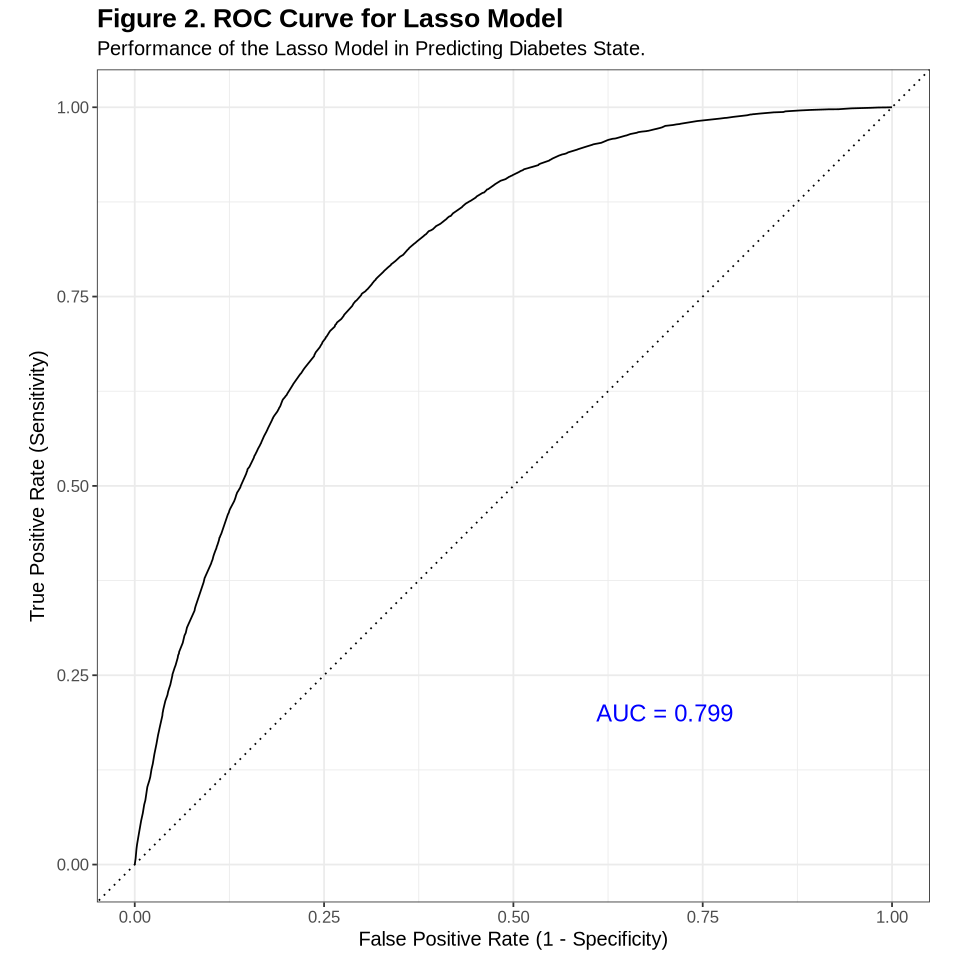

In [25]:
options(repr.plot.width = 8, repr.plot.height = 8)

# Creating the ROC curve
roc_plot <- autoplot(roc_curve(lasso_modelOutputs, Diabetes_binary, .pred_1, event_level = "second")) +
  ggtitle("Figure 2. ROC Curve for Lasso Model") +
  labs(subtitle = "Performance of the Lasso Model in Predicting Diabetes State.", 
       x = "False Positive Rate (1 - Specificity)", 
       y = "True Positive Rate (Sensitivity)") +
  annotate("text", x = 0.7, y = 0.2, label = paste("AUC =", round(roc_auc_value$.estimate, 3)), size = 5, color = "blue") + 
  theme(
    plot.title = element_text(size = 16, face = "bold"),  
    plot.subtitle = element_text(size = 12),  
    axis.title = element_text(size = 12),  
    axis.text = element_text(size = 10)  
  )

roc_plot

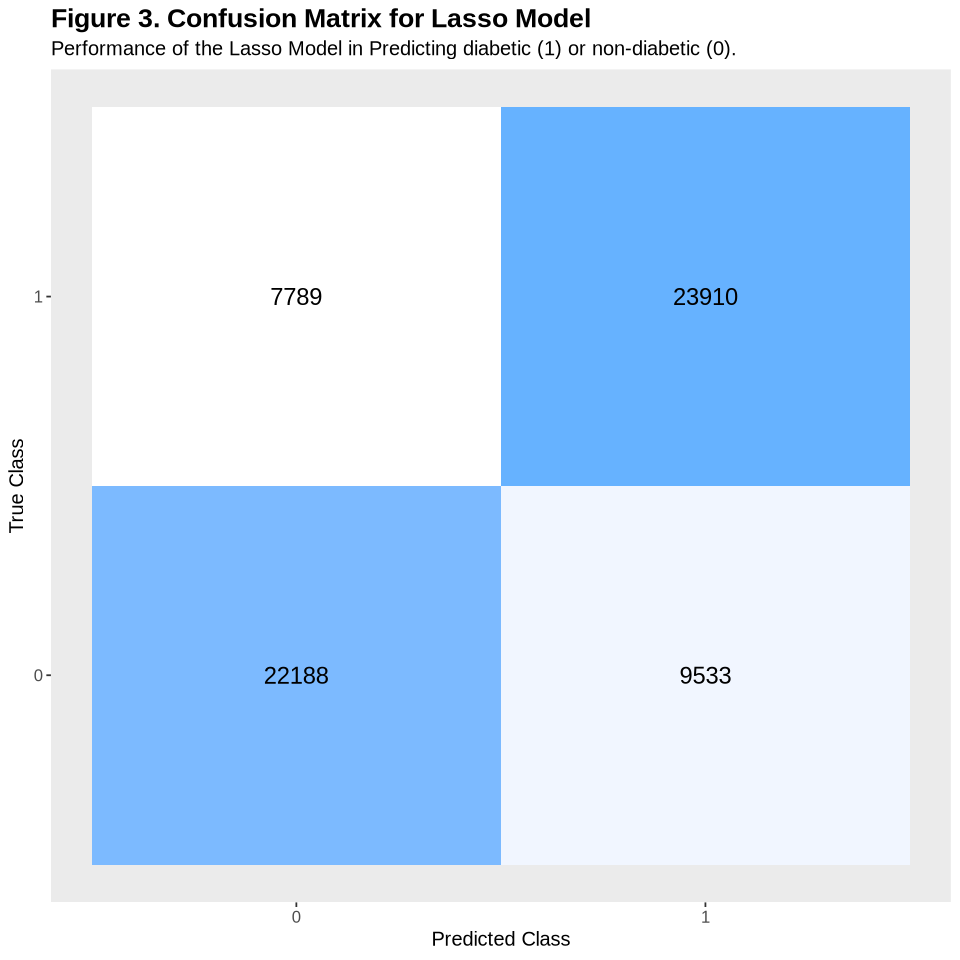

In [29]:
options(repr.plot.width = 8, repr.plot.height = 8)

# Creating the confusion matrix
cm <- conf_mat(lasso_modelOutputs, truth = Diabetes_binary, estimate = .pred_class, event_level = "second")
cm_df <- as.data.frame(cm$table)

cm_plot <- ggplot(cm_df, aes(x = Prediction, y = Truth, fill = Freq)) +
  geom_tile() +  
  geom_text(aes(label = Freq), color = "black", size = 5) +
  scale_fill_gradient(low = "white", high = "#66B2FF") + 
  ggtitle("Figure 3. Confusion Matrix for Lasso Model") +  
  labs(subtitle = "Performance of the Lasso Model in Predicting diabetic (1) or non-diabetic (0).", 
       x = "Predicted Class", 
       y = "True Class",
       fill = "Count") + 
  theme(
    plot.title = element_text(size = 16, face = "bold"),  
    plot.subtitle = element_text(size = 12),  
    axis.title = element_text(size = 12),  
    axis.text = element_text(size = 10), 
    plot.background = element_blank(),   
    panel.grid = element_blank()
  ) +
  guides(fill = "none")

cm_plot

## 4. Discussion

Our model achieved a recall score of 0.7542825 (7 s.f.) on the test set, implying that about 75.43% of all positive instances of diabetes were correctly classified by the LASSO regression model (Table 7). This suggests that the model is relatively effective at identifying individuals who are at risk of developing diabetes. Additionally, the model achieved an area under the ROC curve of 0.7989357 (7 s.f.) on the test set (Table 7). Since the AUC is above 0.5, this indicates that the model can discriminate between diabetic and non-diabetic cases better than random guessing (Fig. 3).

We expected the model to perform better than random guessing, which it did achieve. Additionally, we aimed to minimize false negatives which is particularly important in healthcare diagnoses where a false negative case can have serious consequences. For example, a false negative would indicate that the model predicts the patient to not develop diabetes even though they do. This may lead to the patient not getting the treatment or care they need, potentially resulting in health complications and even death. The model had a false negative rate around 25% which is concerning as it indicates a significant risk for missing positive cases leading to unfavourable patient outcomes.

Our model was optimized for recall through hyperparameter tuning, with cross-validation used to evaluate model performance during the process. However, despite our results, the model falls short of what is expected in clinical applications. For example, more complex models in the literature which incorporate advanced feature selection techniques (Alhussan et al., 2023) or Generative Adversarial Networks (GANs) (Feng et al., 2023) can achieve recall and AUC scores upwards of 97%. 

Our findings serve as a proof of concept for the feasibility of classification models to predict the risk of diabetes based on publicly available health data. Since our model did relatively well compared to random guessing, this indicates potential correlations between health indicators and the likelihood of developing diabetes. With this information, people might be more aware of their health and lifestyle choices. They may be inclined to work harder to reduce cholesterol levels, manage high blood pressure, keep alcohol consumption under control and maintain a healthy lifestyle. Thus, this may help decrease the global mortality rate from diabetes through early interventions and lifestyle changes. 

Future directions could include how we can improve our classification method to more accurately predict the risk of diabetes in patients. We can explore more rigorous feature selection techniques or implement other machine learning models such as boosted trees to improve our classification performance. In the context of the healthcare system, we can look to integrate classification models into the diagnosis process to help detect diabetes early to improve patient outcomes. 

## 5. References

- Akoglu, H. (2018). User’s guide to correlation coefficients. *Turkish Journal of Emergency Medicine, 18*(3), 91–93. https://doi.org/10.1016/j.tjem.2018.08.001

- Alhussan, A. A., Abdelhamid, A. A., Towfek, S. K., Ibrahim, A., Eid, M. M., Khafaga, D. S., & Saraya, M. S. (2023). Classification of diabetes using feature selection and hybrid Al-Biruni Earth radius and dipper throated optimization. *Diagnostics, 13*(12), 2038. https://doi.org/10.3390/diagnostics13122038

- CDC. (2023, September 25). *CDC diabetes health indicators* [Data set]. UCI Machine Learning Repository. https://doi.org/10.24432/C53919

- Dai, J., Teng, L., Zhao, L., & Zou, H. (2021). The combined analgesic effect of pregabalin and morphine in the treatment of pancreatic cancer pain, a retrospective study. *Cancer Medicine, 10*(5), 1738–1744. https://doi.org/10.1002/cam4.3779

- Fang, M., Wang, D., Coresh, J., & Selvin, E. (2022). Undiagnosed diabetes in U.S. Adults: Prevalence and trends. *Diabetes Care, 45*(9), 1994–2002. https://doi.org/10.2337/dc22-0242

- Feng, X., Cai, Y., & Xin, R. (2023). Optimizing diabetes classification with a machine learning-based framework. *BMC Bioinformatics, 24*(1). https://doi.org/10.1186/s12859-023-05467-x

- Mayo Foundation for Medical Education and Research. (2024, March 27). *Diabetes*. Mayo Clinic. Retrieved February 28, 2025 from https://www.mayoclinic.org/diseases-conditions/diabetes/symptoms-causes/syc-20371444

- Ong, K. L., Stafford, L. K., McLaughlin, S. A., Boyko, E. J., Vollset, S. E., Smith, A. E., Dalton, B. E., Duprey, J., Cruz, J. A., Hagins, H., Lindstedt, P. A., Aali, A., Abate, Y. H., Abate, M. D., Abbasian, M., Abbasi-Kangevari, Z., Abbasi-Kangevari, M., ElHafeez, S. A., Abd-Rabu, R., . . . Vos, T. (2023). Global, regional, and national burden of diabetes from 1990 to 2021, with projections of prevalence to 2050: a systematic analysis for the Global Burden of Disease Study 2021. *The Lancet, 402*(10397), 203–234. https://doi.org/10.1016/s0140-6736(23)01301-6

- Papatheodorou, K., Banach, M., Bekiari, E., Rizzo, M., & Edmonds, M. (2018). Complications of Diabetes 2017. *Journal of Diabetes Research*, 1–4. https://doi.org/10.1155/2018/3086167

- StatsTest.com. (2020, April 7). Cramer's V. Retrieved February 28, 2025 from https://www.statstest.com/cramers-v-2/

- Stokes, A., & Preston, S. H. (2017). Deaths attributable to Diabetes in the United States: Comparison of data sources and estimation approaches. *PLoS ONE, 12*(1), e0170219. https://doi.org/10.1371/journal.pone.0170219

- World Health Organization. (2024, November 14). *Diabetes*. Retrieved February 28, 2025 from https://www.who.int/news-room/fact-sheets/detail/diabetes